### RoboPol Data Release Helper

Abstract:

We present uniformly reprocessed and re-calibrated data from the RoboPol programme of optopolarimetric
monitoring of active galactic nuclei (AGN), covering observations between 2013, when the instrument was
commissioned, and 2017. In total, the dataset includes 5068 observations of 222 AGN with Dec > -25 deg.
Average quantities summarising optopolarimetric behaviour  (average degree of polarization, polarization
variability index and preferred polarization angle) are also provided for each source we have observed
and for the time interval we have followed it. 

Acknowledgement:

These data are being made available to the public as a service to the astronomical community.
If you use RoboPol data in your research, we request that you cite the related publication
(https://arxiv.org/abs/2012.00008), allowing us to keep track of the impact of our work,
and that you include the following acknowledgement:
'This research has made use of data from the RoboPol programme, a collaboration between Caltech,
the University of Crete, IA-FORTH, IUCAA, the MPIfR, and the Nicolaus Copernicus University, which was
conducted at Skinakas Observatory in Crete, Greece.'

Author: Ashish Mahabal <aam@astro.caltech.edu> for RoboPol collaboration http://robopol.org 
Dec 2020

### Various Imports

In [1]:
#%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
%matplotlib nbagg

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np




### Read in data, display columns, and top few lines in the two tables

In [2]:
sample = pd.read_csv('sample.csv')
data = pd.read_csv('monitoring_data.csv')

In [3]:
sample.columns

Index(['J2000_name', 'Alt_ID', 'RA[h:m:s]', 'DEC[d:m:s]', 'Redshift',
       'Redshift_ref', 'Sample_ID', 'Aperture[arcsec]', 'N_meas', 'N_seas',
       'Med_time_sampl_int[d]', 'PD_mean[%]', 'PD_mod_ind', 'EVPA_var_ind',
       'Pref_EVPA[deg]'],
      dtype='object')

In [4]:
data.columns

Index(['J2000_name', 'Julian_date', 'Q/I_inst', 'err_Q/I_inst', 'U/I_inst',
       'err_U/I_inst', 'Q/I', 'err_Q/I', 'U/I', 'err_U/I', 'PD[%]',
       'err_PD[%]', 'EVPA[deg]', 'err_EVPA[deg]'],
      dtype='object')

In [5]:
sample.head()

,J2000_name,Alt_ID,RA[h:m:s],DEC[d:m:s],Redshift,Redshift_ref,Sample_ID,Aperture[arcsec],N_meas,N_seas,Med_time_sampl_int[d],PD_mean[%],PD_mod_ind,EVPA_var_ind,Pref_EVPA[deg]
0,RBPLJ0006-0623,PKS 0003-066,00:06:13.9,-06:23:35.3,0.34668,2009MNRAS.399..683J,5,v,15,2,8.0,21.2,0.45,0.13,-14.0
1,RBPLJ0017+8135,S5 0014+81,00:17:08.5,+81:35:08.1,3.366,1994ApJ...436..678O,2;4,v,30,3,7.0,0.8,0.62,0.65,-
2,RBPLJ0035+5950,1ES 0033+595,00:35:52.7,+59:50:04.2,0.086,1999A&A...352...85F,5,6,5,1,8.0,-,-,-,-
3,RBPLJ0045+2127,-,00:45:19.3,+21:27:40.0,-,-,3,v,64,4,3.0,4.83,0.59,0.84,-
4,RBPLJ0102+5824,TXS 0059+581,01:02:45.8,+58:24:11.1,0.644,2005ApJ...626...95S,5,v,18,3,9.0,13.45,0.32,0.53,-


In [6]:
data.head()

,J2000_name,Julian_date,Q/I_inst,err_Q/I_inst,U/I_inst,err_U/I_inst,Q/I,err_Q/I,U/I,err_U/I,PD[%],err_PD[%],EVPA[deg],err_EVPA[deg]
0,RBPLJ0006-0623,2.456550e+06,0.066,0.006,-0.124,0.006,0.063,0.008,-0.126,0.007,14.1,0.7,-31.8,1.4
1,RBPLJ0006-0623,2.456572e+06,0.204,0.009,-0.002,0.009,0.205,0.009,-0.009,0.012,20.5,0.9,-1.3,1.3
2,RBPLJ0006-0623,2.456589e+06,0.287,0.011,-0.091,0.009,0.285,0.012,-0.102,0.014,30.3,1.2,-9.8,1.1
3,RBPLJ0006-0623,2.456593e+06,0.308,0.010,-0.128,0.009,0.304,0.011,-0.139,0.014,33.5,1.2,-12.3,1.0
4,RBPLJ0006-0623,2.456599e+06,0.310,0.004,-0.146,0.004,0.306,0.008,-0.157,0.012,34.4,0.9,-13.6,0.7


### Convert RA/Dec to degrees and add those as separate columns

In [7]:
radeg = []
decdeg = []
for i in range(len(sample['RA[h:m:s]'])):
    c = SkyCoord(sample.iloc[i]['RA[h:m:s]'],sample.iloc[i]['DEC[d:m:s]'], unit=(u.hourangle, u.deg))
    #print(c.ra.deg,c.dec.deg)
    radeg.append(c.ra.deg)
    decdeg.append(c.dec.deg)
    
sample.insert(4,'RA_deg',radeg,True)
sample.insert(5,'DEC_deg',decdeg,True)

### The redshift column contains a few non-numeric flags. Move them to an independent column

In [8]:
RedshiftFlag = []
flags = ['-','m','l','*']
for i in range(len(sample['Redshift'])):
    #print(sample['Redshift'][i][-1])
    if sample['Redshift'][i][-1] in flags:
        RedshiftFlag.append(sample['Redshift'][i][-1])
        newval = sample['Redshift'][i][:-1]
        if newval == '':
            newval = 'NaN'
        sample.Redshift[i]=newval
    else:
        RedshiftFlag.append('')
        
sample.insert(7,'RedshiftFlag',RedshiftFlag,True)

sample = sample.astype({"Redshift": float})

/Users/aam/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Convert '-' in a few other columns to NaNs, and recast the columns as float

In [9]:
cols = ['PD_mean[%]','PD_mod_ind','EVPA_var_ind','Pref_EVPA[deg]']
for col in cols:
    for i in range(len(sample[col])):
        if sample[col][i] == '-':
            sample[col][i] = 'NaN'

/Users/aam/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
for col in cols:
    sample = sample.astype({col: float})

### Plot histogram of redshifts. These and other plots are interactive and allow panning etc.

<IPython.core.display.Javascript object>


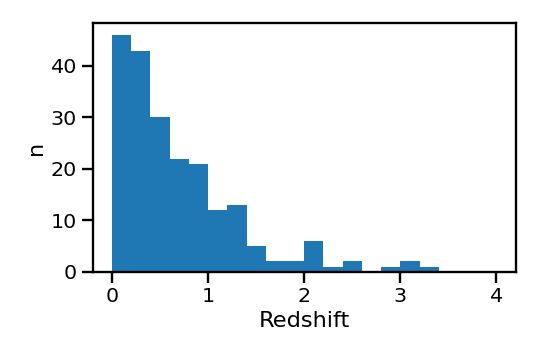

/Users/aam/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/aam/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(sample['Redshift'],range=(0,4),bins=20)
plt.xlabel('Redshift')
plt.ylabel('n')
plt.tight_layout()

### Collect list of sources, and variables to plot interactively
The sources can be selected through drop-down menus

In [12]:
sources = sample['J2000_name']
vars = ['Q/I','U/I','PD[%]','EVPA[deg]']
evars = {'Q/I':'err_Q/I','U/I':'err_U/I','PD[%]':'err_PD[%]','EVPA[deg]':'err_EVPA[deg]'}

In [21]:
def plotfun(source,var):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.errorbar(data[data['J2000_name']==source]['Julian_date'],
                data[data['J2000_name']==source][var],
                yerr=data[data['J2000_name']==source][evars[var]], 
                fmt='.')
    plt.title("%s (n=%d)" % (source,sample[sample['J2000_name']==source]['N_meas']))
    plt.xlabel('Julian Date')
    plt.ylabel(var)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
interact(plotfun,source=sources, var=vars)

interactive(children=(Dropdown(description='source', options=('RBPLJ0006-0623', 'RBPLJ0017+8135', 'RBPLJ0035+5…

<function __main__.plotfun(source, var)>

### Plot the RA-Dec distribution. Also in Aiotoff projection

<IPython.core.display.Javascript object>


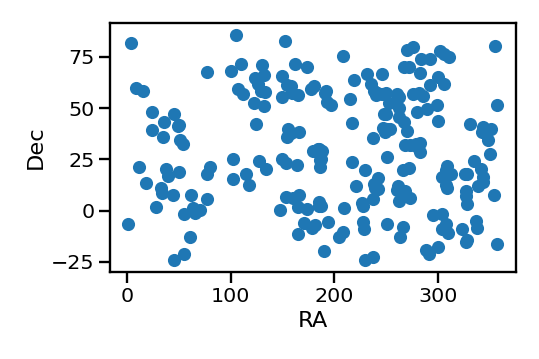

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(sample['RA_deg'],sample['DEC_deg'])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.tight_layout()

<IPython.core.display.Javascript object>


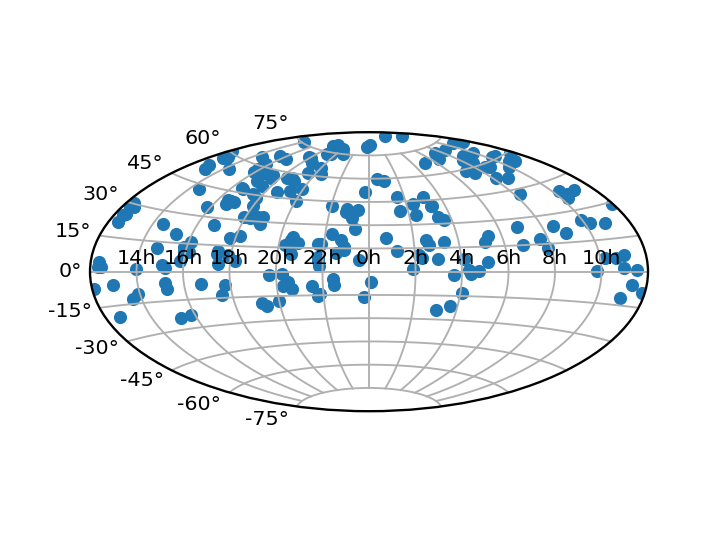

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ra = sample['RA_deg']
#ra = ra.wrap_at(180*u.degree)
ra = np.where(ra>180,ra-360,ra)
dec = sample['DEC_deg']
ax.scatter(ra/57.3,dec/57.3)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

### Plot modulation index and EVPA. Substitute as needed for other columns from above

<IPython.core.display.Javascript object>


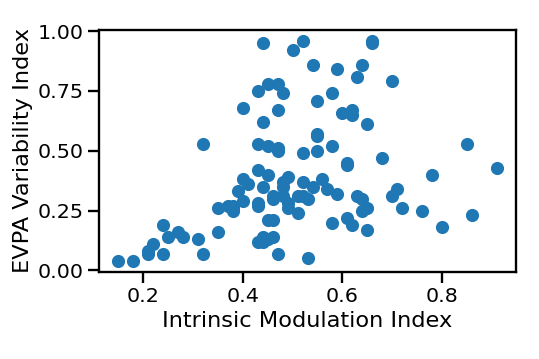

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(sample['PD_mod_ind'],sample['EVPA_var_ind'])
plt.xlabel('Intrinsic Modulation Index')
plt.ylabel('EVPA Variability Index')
plt.tight_layout()

### Display column types. Modify types of remaining columns as above if needed

In [17]:
sample.dtypes

J2000_name                object
Alt_ID                    object
RA[h:m:s]                 object
DEC[d:m:s]                object
RA_deg                   float64
DEC_deg                  float64
Redshift                 float64
RedshiftFlag              object
Redshift_ref              object
Sample_ID                 object
Aperture[arcsec]          object
N_meas                     int64
N_seas                     int64
Med_time_sampl_int[d]     object
PD_mean[%]               float64
PD_mod_ind               float64
EVPA_var_ind             float64
Pref_EVPA[deg]           float64
dtype: object